# Настройки нейросети и переменные для обучения

In [1]:
number_of_param = 4 #Количество аргументов для функции (переменных)
dataset_url = 'https://raw.githubusercontent.com/AnLiMan/Machine-Learning-Course/main/Datasets/WindDatasetGen4.csv'  # Адрес датасета

# Библиотеки

In [2]:
from pandas import read_csv
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Masking, Embedding
from sklearn.preprocessing import MinMaxScaler
from numpy import vstack
from numpy import hstack
from numpy import mean

# Модель нейросети

In [28]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation = activation[0]))
    model.add(Dense(units=hidden_units, activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.add(Dropout(0.5))
    model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["accuracy"])
    return model

demo_model = create_RNN(128, 1, (3,1), activation=['relu', 'softmax']) # Пример создания модели

# Загрузка и подготовка датасета

In [4]:
# Параметр split_percent определяет соотношение обучающих примеров  (в данноми случае 85% - тренировочная выборка)
def get_train_test(url, split_percent=0.85):
    df = read_csv(url, usecols=[1], engine='python') # Чтение датасета, read_csv - метод из библиотеки pandas
    data = np.array(df.values.astype('float32')) # Преобразуем в массив numpy с типом данных float32
    scaler = MinMaxScaler(feature_range=(0, 1)) # Скалируем в диапазон от 0 до 1
    data = scaler.fit_transform(data).flatten()
    n = len(data) # Размер данных
    # Точка для разделения данных на train и test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

train_data, test_data, data = get_train_test(dataset_url)

In [5]:
# Подготовка входных данных X и целевых Y
def get_XY(dat, time_steps):
    # Индексы целевого массива
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Подготовка X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = number_of_param #Количество входных данных для X
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Обучение нейросети

In [33]:
model = create_RNN(hidden_units=128, dense_units=1, input_shape=(time_steps, 1), activation=['relu', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=1, shuffle = True)
model.summary()

Epoch 1/20
60/60 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.0083
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.0167
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.0000e+00
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.0083
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 0.0167
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.0167
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.0083
Epoch 8/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.0083
Epoch 9/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.0167
Epoch 10/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.0083
Epoch 11/20
60/

# Визуализация результатов

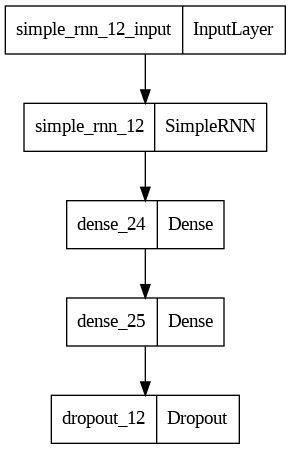

In [34]:
keras.utils.plot_model(model, 'DL_model.png')

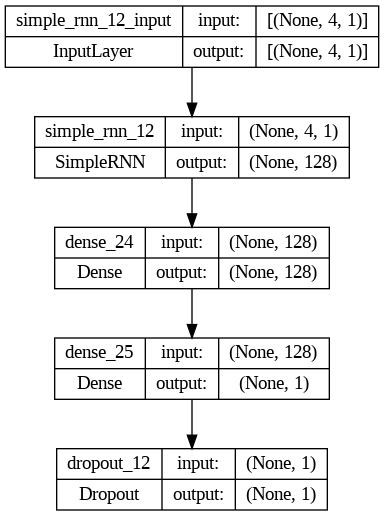

In [35]:
keras.utils.plot_model(model, 'model_with_shape_info.png', show_shapes=True)

## Проверка точности предсказания

### Root Mean Square Error (RMSE) - Среднеквадратичное отклонение

In [36]:
def print_error(trainY, testY, train_predict, test_predict):
    # Ошибка предсказания
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Печать значений
    print('RMSE для тренировочной выборки: %.3f RMSE' % (train_rmse))
    print('RMSE для тестовой выборки: %.3f RMSE' % (test_rmse))

# Сделаем предсказания
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Среднеквадратичное отклонение
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 23ms/step
RMSE для тренировочной выборки: 0.221 RMSE
RMSE для тестовой выборки: 0.112 RMSE


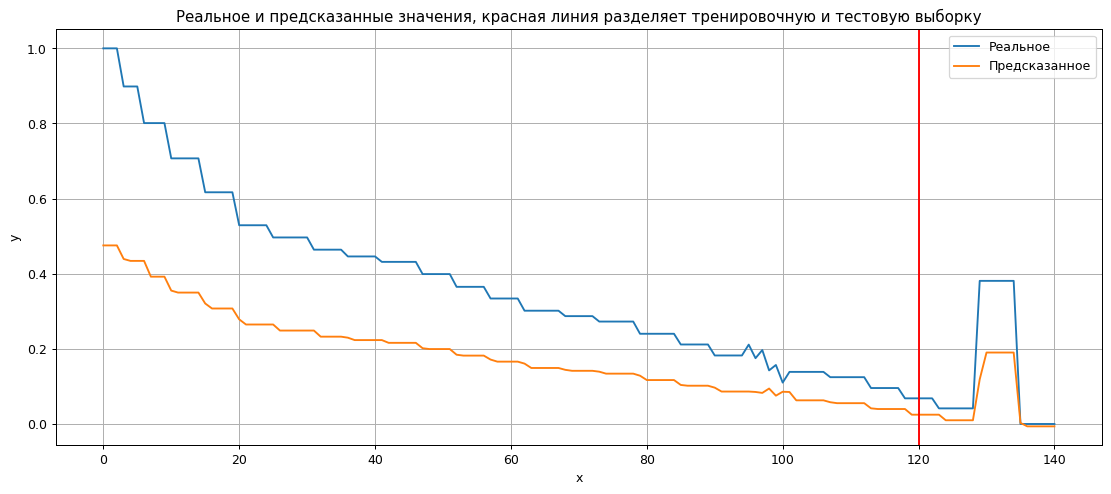

In [37]:
# Графики истиннных значений и предсказаний
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=90)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Реальное', 'Предсказанное'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Реальное и предсказанные значения, красная линия разделяет тренировочную и тестовую выборку')
    plt.grid()
plot_result(trainY, testY, train_predict, test_predict)

### Возьмём поближе

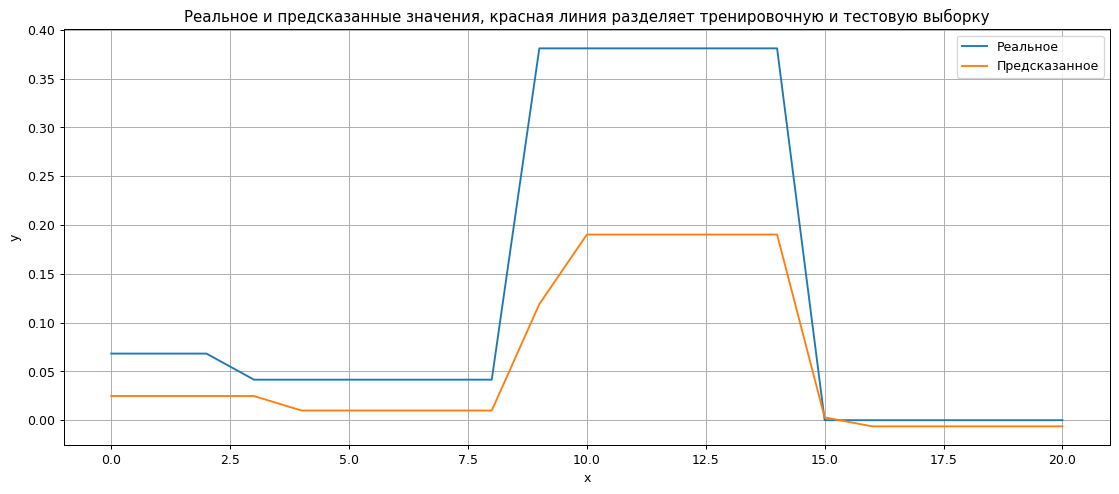

In [38]:
def plot_result(testY , test_predict):
    plt.figure(figsize=(15, 6), dpi=90)
    plt.plot(testY)
    plt.plot(test_predict)
    plt.legend(['Реальное', 'Предсказанное'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Реальное и предсказанные значения, красная линия разделяет тренировочную и тестовую выборку')
    plt.grid()
plot_result(testY, test_predict)